# Objective 
    yt = (rho)yt-1 + (beta1)X1 + (beta2)X2 + ... + epsilon
    
    - Build TSA model to predict whether EU will meet their targeted CO2 emission level
        - X1...Xn: Build a linear model to add to the general TSA formula
        - epsilon: a salad of the excluded features?
            - follow up: how different member states have their own ways of comlying to the genreal standards
     
    - What's the year to use?
        - train and predict year by year?

In [2]:
import pandas as pd
import chardet
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from numpy import random
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.cluster import KMeans
import functions
from scipy import stats
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline
rndseed = functions.RNDSEED

In [2]:
df = functions.pre_pro('data/CO2_passenger_cars_v14.csv')

In [3]:
# remove duplicate
df.drop_duplicates(subset=functions.feature_dict, keep=False, inplace=True)
df.sort_values(by='MP', inplace=True)
df.index = range(df.shape[0])
df.head()

,id,MS,MP,Mh,Man,MMS,TAN,T,Va,Ve,...,r,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,Fm,ec (cm3),ep (KW)
0,141871,NL,BMW GROUP,BMW AG,BAYERISCHE MOTOREN WERKE AG,BAYERISCHE MOTOREN WERKE AG,E1*2007/46*0373*07,ZR,LM71,6H020000,...,1,219.0,1580.0,2496.0,1510.0,1540.0,PETROL,M,2979.0,225.0
1,169868,NL,BMW GROUP,BMW AG,BAYERISCHE MOTOREN WERKE AG,BAYERISCHE MOTOREN WERKE AG,E1*2007/46*0314*18,3L,8F11,6A250000,...,1,125.0,1565.0,2810.0,1530.0,1570.0,DIESEL,M,1995.0,160.0
2,169878,NL,BMW GROUP,BMW AG,BAYERISCHE MOTOREN WERKE AG,BAYERISCHE MOTOREN WERKE AG,E1*2007/46*0314*15,3L,3J91,6H150000,...,1,124.0,1465.0,2810.0,1540.0,1580.0,PETROL,M,1598.0,125.0
3,169888,NL,BMW GROUP,BMW AG,BAYERISCHE MOTOREN WERKE AG,BAYERISCHE MOTOREN WERKE AG,E1*2007/46*0314*18,3L,8B71,6A150000,...,1,162.0,1690.0,2810.0,1530.0,1570.0,PETROL,M,2998.0,240.0
4,169889,NL,BMW GROUP,BMW AG,BAYERISCHE MOTOREN WERKE AG,BAYERISCHE MOTOREN WERKE AG,E1*2007/46*0314*18,3L,8C31,6A350700,...,1,116.0,1525.0,2810.0,1530.0,1570.0,DIESEL,M,1995.0,110.0


In [4]:
# create labels for plotting
labels = np.unique(df.MP)
brands = df.iloc[:,0]*0
for i in range(len(labels)):
    brands[df.loc[df.MP == labels[i]].index] = i

In [5]:
data = df[functions.feature_dict]
data.head()

,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),ec (cm3),ep (KW)
0,219.0,1580.0,2496.0,1510.0,1540.0,2979.0,225.0
1,125.0,1565.0,2810.0,1530.0,1570.0,1995.0,160.0
2,124.0,1465.0,2810.0,1540.0,1580.0,1598.0,125.0
3,162.0,1690.0,2810.0,1530.0,1570.0,2998.0,240.0
4,116.0,1525.0,2810.0,1530.0,1570.0,1995.0,110.0


# Simple Linear Fit

In [6]:
mulr = pd.DataFrame()
mulr.name = 'Original Data'
mulr['y'] = data['e (g/km)'];mulr['x1'] = data['m (kg)'];mulr['x2'] = data['w (mm)'];mulr['x3'] = data['at1 (mm)'];mulr['x4'] = data['at2 (mm)'];mulr['x5'] = data['ec (cm3)'];mulr['x6'] = data['ep (KW)']

In [7]:
lm_1 = smf.ols(formula='y ~ x1+x2+x3+x4+x5+x6', data=mulr).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     4895.
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:24:04   Log-Likelihood:            -1.1017e+05
No. Observations:               24552   AIC:                         2.204e+05
Df Residuals:                   24545   BIC:                         2.204e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.1904      5.320     -8.494      0.000     -55.618     -34.762
x1             0.0145      0.001     15.648      0.000       0.013       0.016
x2             0.0260      0.001     26.923      0.000       0.024       0.028
x3             0.0226      0.004      5.209      0.000       0.014       0.031
x4             0.0082      0.001      5.639      0.000       0.005       0.011
x5             0.0014      0.001      2.713      0.007       0.000       0.002
x6             0.2657      0.005     50.037      0.000       0.255       0.276
==============================================================================
Omnibus:                     3702.024   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41179.225
Skew:                           0.363   Prob(JB):                         0.00
Kurtosis:                       9.303   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
mulr.corr()

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.634416,0.506157,0.560737,0.344896,0.648340,0.645473
x1,0.634416,1.000000,0.777381,0.831006,0.488381,0.690356,0.556575
x2,0.506157,0.777381,1.000000,0.738567,0.428057,0.426079,0.279659
x3,0.560737,0.831006,0.738567,1.000000,0.558583,0.564009,0.456200
x4,0.344896,0.488381,0.428057,0.558583,1.000000,0.331297,0.263975
x5,0.648340,0.690356,0.426079,0.564009,0.331297,1.000000,0.870987
x6,0.645473,0.556575,0.279659,0.456200,0.263975,0.870987,1.000000


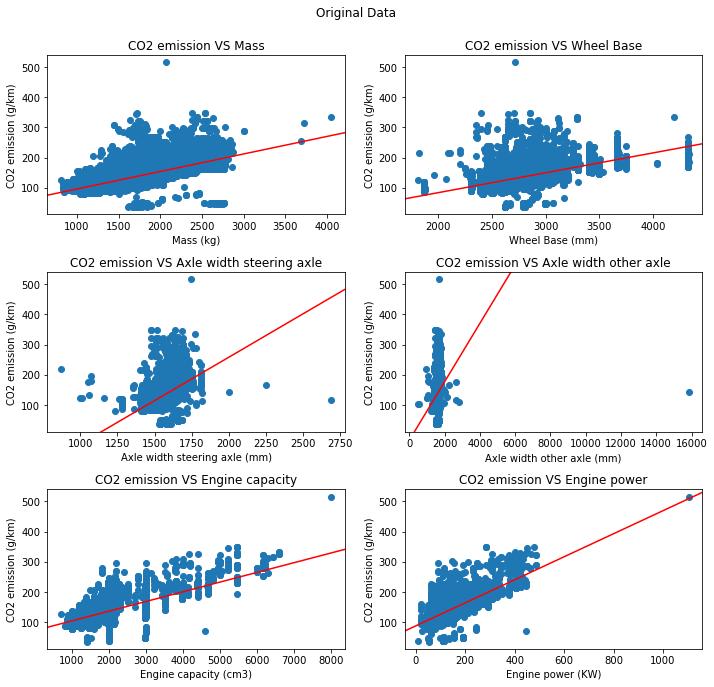

In [9]:
functions.plot_features(mulr, 3, 2)

# PCA

In [10]:
# Standarize to zero mean and unit variance
scaler = preprocessing.StandardScaler().fit(mulr)
scaled_data = scaler.transform(mulr)
y = scaled_data[:, 0]
X = scaled_data[:,1:]

In [11]:
# PCA
pca = PCA(6) # n_components = min(n_samples, n_features)
P = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
print(eigenvalues, '\n\n', pca.components_, '\n\n', pca.explained_variance_)

[ 0.63486598  0.18067803  0.10566642  0.03739812  0.02395676  0.01743469] 

 [[ 0.47495739  0.39874798  0.45215393  0.31715778  0.4191678   0.36698997]
 [ 0.10057023  0.40034917  0.24839589  0.36688222 -0.49430451 -0.62367151]
 [-0.23094048 -0.43546952 -0.09999674  0.85495148  0.02873758  0.12355383]
 [-0.09879591  0.60863743 -0.74931928  0.18097226  0.14466422  0.06813051]
 [-0.72173618  0.34335986  0.35863195 -0.03050897 -0.23858226  0.41800924]
 [ 0.42462201 -0.05245354 -0.18374084  0.01358606 -0.70801577  0.53076659]] 

 [ 3.80935101  1.08411235  0.63402433  0.22439787  0.14374641  0.10461241]


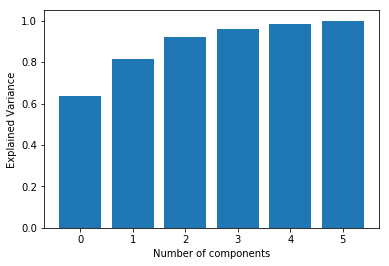

In [12]:
# plot explained variance
n=P.shape[1]
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

# Projectted plots, x and y lims are set to exclude outliers

        -  A whole lot of points, maybe sample them first??

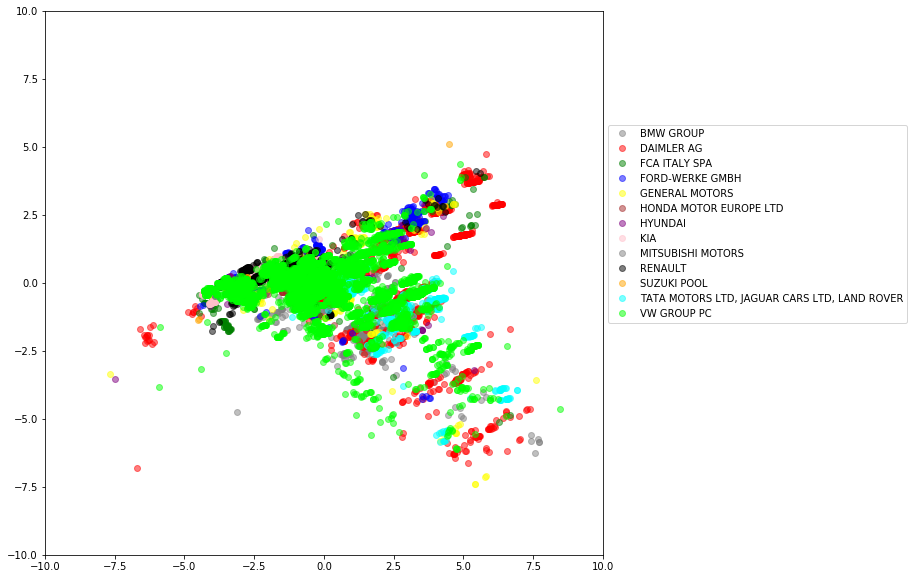

In [13]:
#2-d plot
colors=('gray','red','green','blue','yellow','brown','purple','pink','grey','black','orange','aqua','lime')
fig = plt.figure(figsize=(10,10))
for d in range(len(labels)):
    plt.plot(np.array(P[brands==d,0]), np.array(P[brands==d,1]),
        'o', color=colors[d], alpha=0.5, label=d)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
plt.legend(labels,bbox_to_anchor=(1, 0.8))

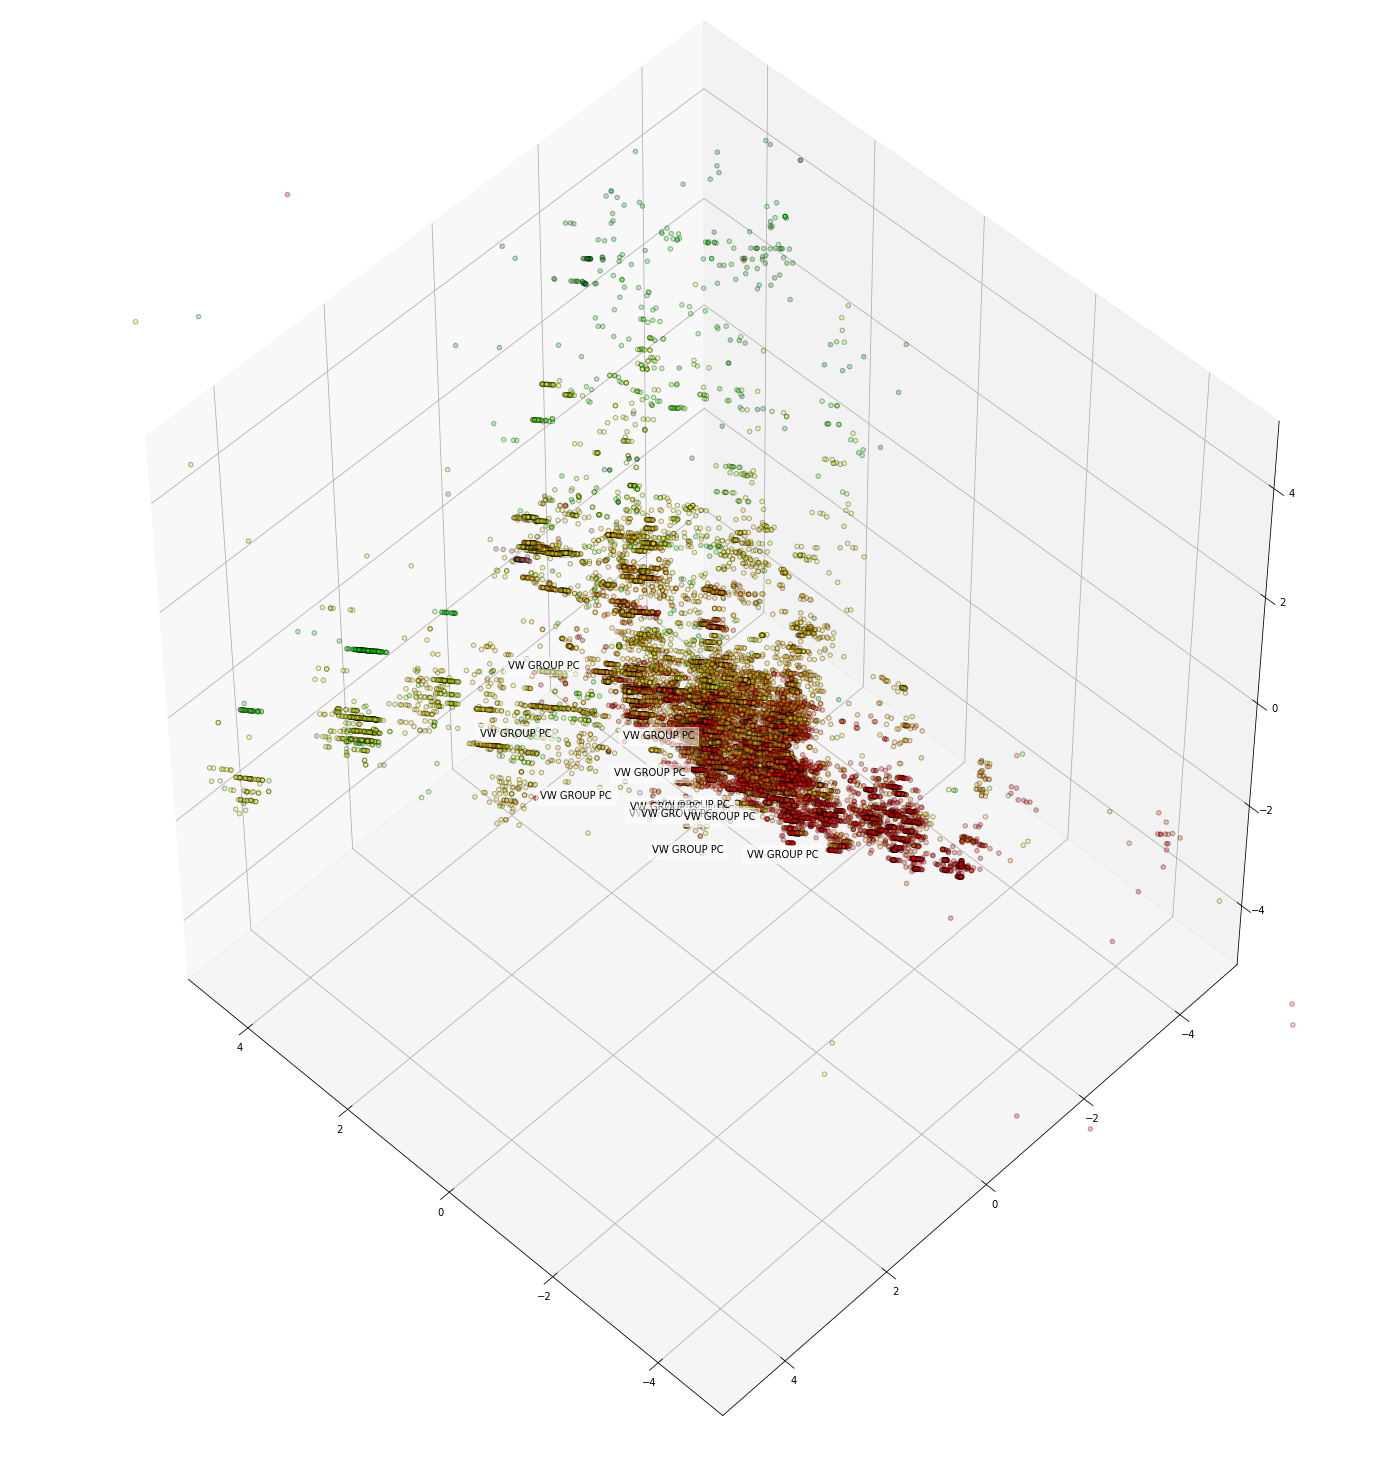

In [14]:
# 3-D plot

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(20, 20))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for l in range(len(labels)):
    ax.text3D(P[brands==l, 0].mean(),
              P[brands==l, 1].mean() + 1.5,
              P[brands==l, 2].mean(), labels[i],
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    ax.set_zlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_xlim(-5,5)
ax.scatter(P[:, 0], P[:, 1], P[:, 2], c=y, cmap='nipy_spectral_r',
           edgecolor='k')

# ***OUTLIER REMOVAL***

        - should be done before PCA
        - but it fucks up my labels, so no
        - maybe later tho
    Also
        - Z test outlier remvoal only works if the data is normally distributed
        - which I did not test
        - DBSCAN works with any distributions
        - but it is annoying as hell, so no

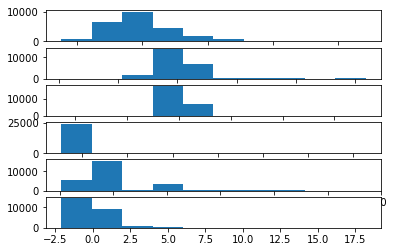

In [15]:
# remove outliers 
fig = plt.figure()
for i in range(X.shape[1]):
    k = X.shape[1]*100 + 10 + i + 1
    ax = fig.add_subplot(k)
    ax = plt.hist(X[:, i])

In [16]:
min_len = np.inf
fx = []
# remove all entries > 3 sigma from the mean
for i in range(X.shape[1]):
    f = pd.DataFrame(X[:, i])
    z = np.abs(stats.zscore(f))
    f = f[z < 3]
    fx.append(f)
    min_len = min(min_len, f.shape[0])
cpy = []
# trim the data to the same shape
for i in fx:
    cpy.append(np.array(i[:min_len]))
fx = cpy

In [17]:
new_x = np.array(fx[0])
for i in range(1, len(fx)):
    new_x = np.append(new_x, fx[i][:min_len], axis=1)

In [18]:
X = new_x

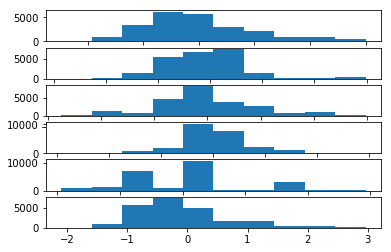

In [19]:
fig = plt.figure()
for i in range(X.shape[1]):
    k = X.shape[1]*100 + 10 + i + 1
    ax = fig.add_subplot(k)
    ax = plt.hist(X[:, i])

In [20]:
# PCA
pca = PCA(6) # n_components = min(n_samples, n_features)
P = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
print(eigenvalues, '\n\n', pca.components_, '\n\n', pca.explained_variance_)

[ 0.50814966  0.1565331   0.11561202  0.10535938  0.05876844  0.05557741] 

 [[ 0.55103379  0.21744896  0.51261864  0.23280025  0.40988928  0.40508599]
 [-0.26560061  0.17889528 -0.58146458 -0.09420986  0.53956829  0.50925661]
 [ 0.78079761  0.00743437 -0.58577877 -0.09039342 -0.16940275 -0.1014633 ]
 [-0.08940808  0.95604139 -0.02044527  0.03882607 -0.22274952 -0.16262913]
 [ 0.03285097  0.03228371 -0.03174188  0.05361043  0.67400358 -0.73465374]
 [-0.08426258 -0.07483168 -0.23357815  0.96144476 -0.09089207 -0.01019236]] 

 [ 2.07724451  0.63988534  0.47260572  0.43069436  0.24023714  0.22719264]


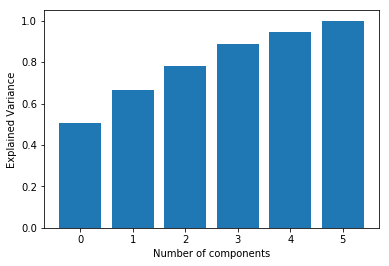

In [21]:
# plot explained variance
n=P.shape[1]
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()